In [11]:
cd pkls

/Users/burakcivitcioglu/Documents/doctorat/ising/pkls


In [2]:
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt

mypath = '/Users/burakcivitcioglu/Documents/doctorat/ising/pkls'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [7]:
onlyfiles.sort(reverse=True)

In [8]:
onlyfiles

['SQ_L_100_J_1.00_h_0.00_T_4.00_s_4136_n_0.pkl',
 'SQ_L_100_J_1.00_h_0.00_T_3.90_s_4136_n_0.pkl',
 'SQ_L_100_J_1.00_h_0.00_T_3.80_s_4136_n_0.pkl',
 'SQ_L_100_J_1.00_h_0.00_T_3.70_s_4136_n_0.pkl',
 'SQ_L_100_J_1.00_h_0.00_T_3.60_s_4136_n_0.pkl',
 'SQ_L_100_J_1.00_h_0.00_T_3.50_s_4136_n_0.pkl',
 'SQ_L_100_J_1.00_h_0.00_T_3.40_s_4136_n_0.pkl',
 'SQ_L_100_J_1.00_h_0.00_T_3.30_s_4136_n_0.pkl',
 'SQ_L_100_J_1.00_h_0.00_T_3.20_s_4136_n_0.pkl',
 'SQ_L_100_J_1.00_h_0.00_T_3.10_s_4136_n_0.pkl',
 'SQ_L_100_J_1.00_h_0.00_T_3.00_s_4136_n_0.pkl',
 'SQ_L_100_J_1.00_h_0.00_T_2.90_s_4136_n_0.pkl',
 'SQ_L_100_J_1.00_h_0.00_T_2.80_s_4136_n_0.pkl',
 'SQ_L_100_J_1.00_h_0.00_T_2.70_s_4136_n_0.pkl',
 'SQ_L_100_J_1.00_h_0.00_T_2.60_s_4136_n_0.pkl',
 'SQ_L_100_J_1.00_h_0.00_T_2.50_s_4136_n_0.pkl',
 'SQ_L_100_J_1.00_h_0.00_T_2.40_s_4136_n_0.pkl',
 'SQ_L_100_J_1.00_h_0.00_T_2.30_s_4136_n_0.pkl',
 'SQ_L_100_J_1.00_h_0.00_T_2.20_s_4136_n_0.pkl',
 'SQ_L_100_J_1.00_h_0.00_T_2.10_s_4136_n_0.pkl',
 'SQ_L_100_J_1.00_h_

In [9]:
pkl_files = []

In [12]:
import pickle
for i in onlyfiles:
    with open(i, 'rb') as f:
        pkl_files.append(pickle.load(f))

In [13]:
import numpy as np
pkl_files = np.array(pkl_files)
pkl_files[0]['correlation_length']

0.46237073076199964

In [14]:
correlation_lengths = np.zeros(28)
for i in np.arange(pkl_files.size):
    correlation_lengths[i] = pkl_files[i]['correlation_length']

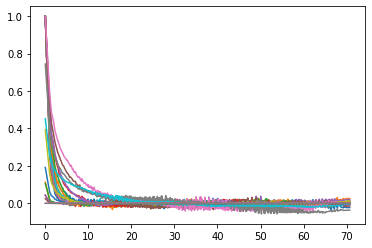

In [15]:
for i in np.arange(pkl_files.size):
    plt.plot(pkl_files[0]['distances'],pkl_files[i]['correlation_function'])


In [16]:
temperature = np.array([4,3.9,3.8,3.7,3.6,3.5,3.4,3.3,3.2,3.1,3.0,2.9,2.8,2.7,2.6,2.5,2.4,2.3,2.2,2.1,2.0,1.9,1.8,1.7,1.6,1.5,1.0,0.5])

{'configuration': array([[ 1.,  1., -1., ..., -1.,  1., -1.],
       [ 1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1.,  1.,  1.],
       ...,
       [ 1., -1.,  1., ...,  1., -1., -1.],
       [-1., -1., -1., ...,  1., -1., -1.],
       [-1., -1., -1., ...,  1., -1., -1.]]), 'energy': -0.5644, 'magnetization': 0.0134, 'correlation_length': 0.46237073076199964, 'correlation_function': array([ 9.9982044e-01,  2.8202044e-01,  1.4202044e-01, ...,
        8.2044000e-04, -7.9795600e-03, -7.9795600e-03]), 'distances': array([ 0.        ,  1.        ,  1.41421356, ..., 69.3108938 ,
       70.00714249, 70.71067812])}
{'configuration': array([[ 1., -1., -1., ..., -1.,  1.,  1.],
       [ 1., -1.,  1., ..., -1., -1.,  1.],
       [-1.,  1.,  1., ..., -1., -1., -1.],
       ...,
       [ 1., -1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1., -1.],
       [ 1.,  1.,  1., ...,  1.,  1., -1.]]), 'energy': -0.568, 'magnetization': -0.0212, 'correlation_length': 0.

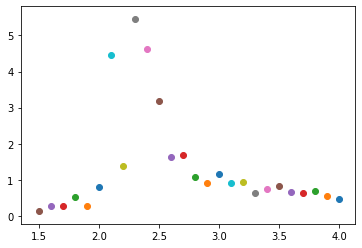

In [17]:
for i in np.arange(pkl_files.size-2):
    plt.scatter(temperature[i],pkl_files[i]['correlation_length'])
    print(pkl_files[i])


In [11]:
distances = pkl_files[0]["distances"]

In [12]:
def get_cor_len(data_cut, distance_cut):
    correlation_negative_check = np.sum(data_cut* \
                (distance_cut**2))
    correlation_zero_check = np.sum(6*data_cut)
    if correlation_zero_check == 0:
        correlation_length = 0
    elif correlation_negative_check/correlation_zero_check<0:
        correlation_length = 0
    else:
        correlation_length = np.sqrt(correlation_negative_check/correlation_zero_check)
    return correlation_length

In [13]:
def get_index(data):
    for i in np.arange(data.size):
        if data[i] < 0:
            my_index = i
            break
    return my_index

def data2cut(data,my_index):
    return data[0:my_index]

def distance2cut(distance,my_index):
    return distance[0:my_index]

In [14]:
temps

array([1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3,
       2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6,
       3.7, 3.8, 3.9, 4. ])

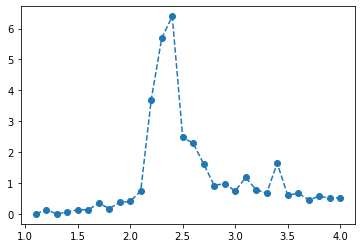

In [15]:
distance = pkl_files[0]['distances']
corr_length = np.zeros(temps.size)

for i in np.arange(temps.size):
    my_index = get_index(pkl_files[i]['correlation_function'])
    data_cut = data2cut(pkl_files[i]['correlation_function'],my_index)
    distance_cut = distance2cut(distance,my_index)
    corr_length[i] = get_cor_len(data_cut,distance_cut)
plt.plot(temps,corr_length,linestyle='--', marker='o')    

In [16]:
pkl_files[12]

{'configuration': array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ..., -1.,  1.,  1.],
        [ 1., -1.,  1., ..., -1., -1., -1.],
        ...,
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1., -1.]]),
 'energy': -1.3752,
 'magnetization': 0.0604,
 'correlation_length': 2.1347745021920774,
 'correlation_function': array([0.99635184, 0.68395184, 0.60635184, ..., 0.02995184, 0.02955184,
        0.02955184]),
 'distances': array([ 0.        ,  1.        ,  1.41421356, ..., 69.3108938 ,
        70.00714249, 70.71067812])}

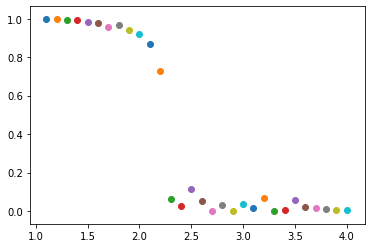

In [17]:
for i in np.arange(pkl_files.size):
    plt.scatter(temps[i],np.abs(pkl_files[i]['magnetization']))

